<a href="https://colab.research.google.com/github/campusplage/compte-rendus-bobo_florian__seck_omar/blob/master/TP1_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Entrez ici vos noms et prénoms

# TP 1: `pandas` et visualisation


---
Ce notebook contient votre compte-rendu pour le TP1.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# 1. Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.

## a. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## b. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
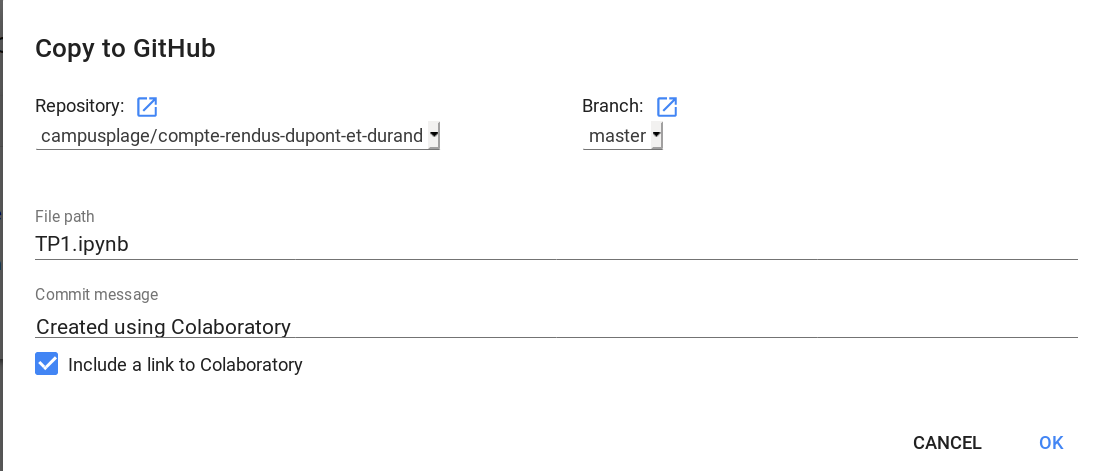

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 2. Charger des données (2 points)


1. Créez un `DataFrame` appelé `raw_data` à partir du fichier suivant:
https://husson.github.io/img/pluie.csv 
2. Renommez la première colonne `Ville` et utilisez-la en index
3. Affichez les premières lignes de la structure créée

> Modifiez la cellule suivante pour effectuer ces opérations

In [19]:
# on importe le package pandas
import pandas 


# Commentez chaque ligne de code !
# VOTRE TRAVAIL ICI
# On importe le fichier csv sous forme d 'une dataframe 
raw_data=pandas.read_csv('https://husson.github.io/img/pluie.csv',encoding = "ISO-8859-1", sep=';') 
 
# On se débarasse de la colonne "Unnamed "
#
#On met les villes en index.
raw_data=raw_data.rename(columns={'Unnamed: 0': 'ville'})
raw_data=raw_data.set_index('ville')
#On affiche les 5 premières lignes de la dataframe pour s'assurer brièvement de l'intégrité des données .

raw_data.head()




,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


Executez ensuite le code suivant, et commentez à chaque fois qu'il y a marqué "Commentez".

In [20]:
# On créer une liste des mois 
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet',
          'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
# on créer une autre liste pour 
types = ['Précipitations', 'Jours de pluie']

# On crée un indexage multiples pour avoir les précipitations et les jours de pluis dans un multi indexage différent sur les colonnes
index = pandas.MultiIndex.from_product((types, months),
                                       names=['Grandeur', 'Mois'])

# On récupère les colonnes des mois pour les précipitations et les Jours de pluies .
nested_columns = list(range(12)) + list(range(13, 25))

# on crée une DataFrame, avec un multi-index pour ces colonnes imbriquées
data = pandas.DataFrame(raw_data.iloc[:,nested_columns].to_numpy(), columns=index)
#Petite erreur dans le code précédent , rain_columns correspondait à nested_columns.
# On réindexe la nouvelle dataframe par rapport aux index de lignes de raw_data 
data = data.set_index(raw_data.index)

# On va rajouter les autres colonnes qui ne dépendant pas des index de colonnes .
other_columns = ['Température moyenne annuelle', 'Amplitude annuelle des températures',
                 'Insolation annuelle', 'Latitude', 'Longitude', 'Géographie']
data[other_columns] = raw_data[other_columns]

# Affichage
print('========================')
print('affichage des précipitations')
display(data['Précipitations'].head() ) 
print('========================')
print('affichage des jours de pluies ')
display(data['Jours de pluie'].head() ) 
print('========================')
print('affichage complet')
display(data.head())
print('========================')

affichage des précipitations


Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
ville,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0


affichage des jours de pluies 


Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
ville,,,,,,,,,,,,
Ajaccio,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0
Angers,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0
Angoulème,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0
Besançon,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0
Biarritz,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0


affichage complet


Grandeur  Précipitations                ... Latitude Longitude Géographie
Mois             Janvier Février  Mars  ...                              
ville                                   ...                              
Ajaccio             78.0    69.0  51.0  ...    41.55      8.44        Sud
Angers              65.0    50.0  60.0  ...    47.28     -0.33      Ouest
Angoulème           79.0    68.0  64.0  ...    45.39      0.09      Ouest
Besançon            94.0    87.0  75.0  ...    47.15      6.02        Est
Biarritz           128.0   105.0  98.0  ...    43.29     -1.34      Ouest

[5 rows x 30 columns]

Comme vous le constatez, `pandas` est en fait encore plus puissant que ce que je vous ai raconté: on peut avoir des index imbriqués, à la fois pour les lignes et pour les colonnes. Cela peut s'avérer très pratique pour manipuler des données réellement compliquées.

> En pratique, cela signifie qu'une colonne donnée d'un `DataFrame` n'est pas forcément un objet `Series`, contrairement à ce que je vous avais dit à des fins pédagogiques.

> Dans le code ci-dessus, on a éliminé les colonnes redondantes (qu'on peut calculer simplement à partir des données)

# 3. Indiçage (3 points)

À ce stade, vous devriez disposer d'un objet `data`, qui regroupe les données dans un `DataFrame`. 

> Dans chacune des cellules suivantes, écrivez le code nécessaire à répondre à la question posée.

In [21]:
# Affichez seulement les précipitations mensuelles de toutes les villes
data['Précipitations'].head()    #On affiche que les 5 premières lignes pour ne pas surcharger le notebook

Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
ville,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0


In [22]:
# Affichez le nombre de jours de pluie de toutes les villes pour les mois de "Juin", "Juillet" et "Août"
data['Jours de pluie'][['Juin','Juillet','Août']].head()  #On affiche que les 5 premières lignes pour ne pas surcharger le notebook

Mois,Juin,Juillet,Août
ville,,,
Ajaccio,4.0,1.0,2.0
Angers,10.0,11.0,11.0
Angoulème,11.0,12.0,12.0
Besançon,14.0,14.0,13.0
Biarritz,14.0,13.0,13.0


In [23]:
# Affichez une phrase qui indique la latitude et longitude d'Angoulème. 
# J'importe numpy 
import numpy as np 
# (utilisez `loc` et le formattage de chaines de caractère avec print)
# data[['Latitude','Longitude']].loc['Angoulème'] 
#Je créer une fonction pour afficher les coordonnées d'une ville 
def coord(data,city): 
    ''' Fonction pour afficher à partir du jeu de donnnées uniformisé du TP1 la longitude et la latitude : 
         coord(data,city) : 
         variable : 
                  data = le jeu de données respectant le format du TP1 
                  city = la ville considéré  
    ''' 
    tmp= np.asarray(data[['Latitude','Longitude']].loc['Angoulème']) # Je mets la latitude et la longitude dans un vecteurs 
    print(" Pour la ville : {}  la longitude est {} et la latitude est {} ".format(city,tmp[1],tmp[0])) 
    # J'utilise la méthode format() pour afficher le nom de la ville , puis la longitude de cette ville et la latitude de cette ville .
coord(data,'Angoulème') # Je lance la fonction pour afficher les coordonnées 


 Pour la ville : Angoulème  la longitude est 0.09 et la latitude est 45.39 


> Dans l'exemple précédent, vous aurez peut-être noté que `data.at['Angoulème', 'Longitude']` ne marche pas.  
Cela est du au fait que `data` a un multi-index pour ses colonnes. Cela signifie qu'en fait, une entrée particulière est donnée par la spécification de toutes les valeurs pour ses colonnes. Cela donnerait:
``` data.at['Angoulème', ('Longitude','')]```.  
   L'utilisation de `loc` permet de s'affranchir de cette complication.

In [24]:
# Affichez les nombres de jours de pluie mensuels de toutes les données aux villes ayant un nom compris
# entre "Montpellier" et "Paris" dans l'ordre alphabétique 
data['Jours de pluie'].sort_values(by = 'ville', ascending = True).loc['Montpellier':'Paris'] 
# One-liner : On récupère les jours de pluies du multi indexage , on classe l'index ('ville') par ordre alphabetique  et on affiche les lignes 
# de Montpellier à Paris 


Mois,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
ville,,,,,,,,,,,,
Montpellier,8.0,6.0,8.0,8.0,9.0,5.0,3.0,6.0,7.0,9.0,9.0,10.0
Nancy,16.0,13.0,12.0,13.0,13.0,13.0,12.0,13.0,12.0,13.0,15.0,16.0
Nantes,18.0,14.0,14.0,11.0,13.0,11.0,12.0,12.0,14.0,15.0,16.0,18.0
Nice,9.0,7.0,8.0,9.0,8.0,5.0,2.0,4.0,7.0,9.0,9.0,9.0
Nîmes,8.0,6.0,9.0,8.0,9.0,6.0,4.0,6.0,7.0,9.0,10.0,10.0
Orléans,16.0,13.0,12.0,12.0,13.0,11.0,11.0,12.0,12.0,13.0,15.0,16.0
Paris,17.0,14.0,12.0,13.0,12.0,12.0,12.0,13.0,13.0,13.0,15.0,16.0


In [25]:
# Affichez à la fois les précipitations mensuelles et la "Géographie" des mêmes villes 
data[['Précipitations','Géographie']]

Grandeur    Précipitations                ...                   Géographie
Mois               Janvier Février  Mars  ... Novembre Décembre           
ville                                     ...                             
Ajaccio               78.0    69.0  51.0  ...    105.0     96.0        Sud
Angers                65.0    50.0  60.0  ...     80.0     70.0      Ouest
Angoulème             79.0    68.0  64.0  ...     79.0     88.0      Ouest
Besançon              94.0    87.0  75.0  ...     92.0     93.0        Est
Biarritz             128.0   105.0  98.0  ...    175.0    176.0      Ouest
Bordeaux             100.0    84.0  66.0  ...     99.0    117.0      Ouest
Brest                130.0    98.0  89.0  ...    136.0    159.0      Ouest
Caen                  65.0    61.0  45.0  ...     79.0     71.0       Nord
Clermont-Fd           28.0    27.0  30.0  ...     39.0     30.0        Est
Dijon                 62.0    48.0  51.0  ...     67.0     61.0        Est
Embrun                61.0    55.0  55.0  ...     81.0     62.0        Sud
Grenoble              80.0    79.0  69.0  ...     90.0     98.0        Est
Lille                 45.0    43.0  38.0  ...     56.0     56.0       Nord
Limoges               87.0    75.0  68.0  ...     82.0     98.0      Ouest
Lyon                  53.0    50.0  60.0  ...     80.0     62.0        Est
Marseille             36.0    49.0  40.0  ...     69.0     61.0        Sud
Montpellier           56.0    59.0  69.0  ...     70.0     73.0        Sud
Nancy                 66.0    58.0  43.0  ...     59.0     67.0        Est
Nantes                83.0    65.0  53.0  ...     95.0     94.0      Ouest
Nice                  67.0    83.0  71.0  ...    158.0     92.0        Sud
Nîmes                 52.0    53.0  57.0  ...     83.0     60.0        Sud
Orléans               57.0    48.0  43.0  ...     61.0     54.0      Ouest
Paris                 53.0    48.0  40.0  ...     58.0     51.0       Nord
Perpignan             27.0    52.0  59.0  ...     70.0     71.0        Sud
Poitiers              65.0    58.0  56.0  ...     78.0     68.0      Ouest
Reims                 43.0    44.0  42.0  ...     52.0     50.0        Est
Rennes                57.0    50.0  45.0  ...     73.0     66.0      Ouest
Rouen                 65.0    58.0  50.0  ...     68.0     66.0       Nord
St-Quentin            52.0    50.0  46.0  ...     63.0     65.0       Nord
Strasbourg            51.0    44.0  42.0  ...     51.0     47.0        Est
Toulon                76.0    86.0  82.0  ...    117.0    107.0        Sud
Toulouse              53.0    50.0  52.0  ...     58.0     65.0        Sud
Tours                 63.0    55.0  52.0  ...     68.0     65.0      Ouest
Vichy                 50.0    45.0  51.0  ...     58.0     55.0        Est

[34 rows x 13 columns]

In [26]:
# Affichez les trois dernières colonnes de la table pour les 15 premières villes
data[data.columns[-3:]]   # Je récupère le nom des trois dernières colonnes et je les mets dans l' indexage  de colonne de ma dataframe . 

Grandeur,Latitude,Longitude,Géographie
Mois,,,
ville,,,
Ajaccio,41.55,8.44,Sud
Angers,47.28,-0.33,Ouest
Angoulème,45.39,0.09,Ouest
Besançon,47.15,6.02,Est
Biarritz,43.29,-1.34,Ouest
Bordeaux,44.50,-0.34,Ouest
Brest,48.24,-4.29,Ouest
Caen,49.11,-0.21,Nord


# 4. Réorganisation et pivotage  (4 points)


## a. Groupage des niveaux dans un `MultiIndex`


On dispose d'un objet `data` qui a un MultiIndex sur ses colonnes.

Plutôt que de stocker des données redondantes comme dans les données initiales (colonnes 'Nombre annuel de jours de pluie' ou 'Précipitations sept-oct' par exemple), il est plus judicieux de les calculer à la demande.

Une fois encore, `pandas` dispose de nombreux moyens de regrouper, agrégrer, réorganiser les données.

Dans notre exemple, on peut facilement réunir toutes les données mensuelles, pour calculer les précipitations et nombres de jours de pluie annuels.  
Cela se fait avec la fonction [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). En l'occurrence, on voit que le paramètre `level` correspond exactement à ce qu'on cherche

In [0]:
grouped_data = data.groupby(axis=1, level='Grandeur')

En fait, `groupby` retourne des __groupes__ sur les données. Ici par exemple, toutes les valeurs de précipitations de nombres de jours de pluie sont groupées.

Ce qui est renvoyé par `groupby` est ici un objet de type `DataFrameGroupBy`, tel que décrit [ici](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html). 
Pour rentrer un peu dans les détails, on peut afficher les groupes créés.

In [28]:
# par une petite boucle sur les différents groupes créés, on peut en afficher le nom
for group in grouped_data.groups:
  print(group)

Amplitude annuelle des températures
Géographie
Insolation annuelle
Jours de pluie
Latitude
Longitude
Précipitations
Température moyenne annuelle


Et ici, on est simplement intéressés par le total au sein de chaque groupe. Il suffit d'appliquer la fonction `max`.

In [29]:
# Afficher pour toutes les villes le nombre annuel de jours de pluie et les précipitations annuelles. 
Group_all=grouped_data.sum()[['Précipitations','Jours de pluie']]  
Group_all 


Grandeur,Précipitations,Jours de pluie
ville,,
Ajaccio,653.0,95.0
Angers,690.0,154.0
Angoulème,826.0,160.0
Besançon,1088.0,169.0
Biarritz,1474.0,177.0
Bordeaux,947.0,162.0
Brest,1157.0,201.0
Caen,713.0,169.0
Clermont-Fd,571.0,132.0


In [30]:
# Comparer avec les colonnes correspondantes de `raw_data`. 
 # Méthode bitwise 'all' pour comparer la liste des booléens de comparaison entre chaque ligne
Precip=(raw_data['Précipitations annuelles']== Group_all['Précipitations']).all(axis=0) 
# Méthode bitwise 'all' pour comparer la liste des booléens de comparaison entre chaque ligne
Jourpluie=(raw_data['Nombre annuel de jours de pluie']== Group_all['Jours de pluie']).all(axis=0)  
# Petite fonction pour renvoyer la valeur en charactère du booléen : 
def bool_string(x): 
  ''' Retourne la valeur d'un booléen sous forme de charactères ''' 
  if x == True : 
    return 'True'
  else : 
    return 'False'
 # On affiche les résultats de la comparaison : 
print(f"Est ce que les précipitations annuelles ont bien été calculées : {bool_string(Precip)} ")
print(f'Est ce que le nombre annuel de jours de pluie a bien été calculé : {bool_string(Jourpluie)}')   

# vous pouvez utiliser `to_numpy` et l'opérateur de comparaison `==` 

Est ce que les précipitations annuelles ont bien été calculées : True 
Est ce que le nombre annuel de jours de pluie a bien été calculé : True


Maintenant, recalculez-vous même les cumuls de précipitations et de jours de pluie de mai à août.

> Pour vous aider, regardez ce que donne:  
  `data.loc[:,(['Précipitations','Jours de pluie'], [None, 'Janvier','Mars'])]`

In [31]:
# cumul des précipitations et du nombre de jours de pluie de mai à août par ville
maiout= data.loc[:,(['Précipitations','Jours de pluie'], ['Mai','Juin','Juillet','Août'])]  # On récupère les précipitations et les jours de pluie de Mai à Août
prec_cumul=maiout['Précipitations'].transpose().sum() # On fait le cumul des précipitations 
jour_cumul=maiout['Jours de pluie'].transpose().sum()  # On fait le cumul des Jours de pluie 
Cumul=pandas.DataFrame([prec_cumul,jour_cumul],index=['Cumul précipitation Mai-Août','Cumul jours de pluie Mai-Août']).transpose() 
del prec_cumul , jour_cumul , maiout    #On supprime les objets créers pour éviter de surcharger la mémoire . 
Cumul #On affiche la dataframe créée 
data.loc[:,(['Précipitations','Jours de pluie'], ['Mai','Juin','Juillet','Août'])].groupby(axis=1,level='Grandeur').sum()

Grandeur,Jours de pluie,Précipitations
ville,,
Ajaccio,15.0,91.0
Angers,45.0,200.0
Angoulème,49.0,247.0
Besançon,55.0,389.0
Biarritz,57.0,383.0
Bordeaux,48.0,252.0
Brest,56.0,265.0
Caen,52.0,207.0
Clermont-Fd,43.0,275.0


## b. Pivotage




En partant de la table initiale, génerer une table ressemblant à:



| |Ville | Grandeur | Mois | Valeur |
|-|------|----------|------|--------|
|0|Ajaccio|Précipitations|Janvier|78.0|
|1|Angers|Précipitations|Janvier|65.0|
...
|814|Tours|Jours de pluie|Décembre|16.0|
|815|Vichy|Jours de pluie|Décembre|16.0|

> _Conseil_: utilisez `melt`

In [32]:
# premier pivot des données avec melt
#On drope les colonnes qui ne nous intéresse pas pour éviter problème dans le pivot, et on précise  'ville" comme variable à identifier 

data.drop(other_columns,axis=1).reset_index().melt( id_vars ='ville')


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


,ville,Grandeur,Mois,value
0,Ajaccio,Précipitations,Janvier,78.0
1,Angers,Précipitations,Janvier,65.0
2,Angoulème,Précipitations,Janvier,79.0
3,Besançon,Précipitations,Janvier,94.0
4,Biarritz,Précipitations,Janvier,128.0
...,...,...,...,...
811,Strasbourg,Jours de pluie,Décembre,14.0
812,Toulon,Jours de pluie,Décembre,11.0
813,Toulouse,Jours de pluie,Décembre,14.0
814,Tours,Jours de pluie,Décembre,16.0


À présent, génerer une table ressemblant à:

| |Ville | Géographie | Grandeur | Mois | Valeur |
|-|------|------------|----------|------|--------|
|0|Ajaccio|Sud|Précipitations|Janvier|78.0|
|1|Angers|Ouest|Précipitations|Janvier|65.0|
...
|814|Tours|Ouest|Jours de pluie|Décembre|16.0|
|815|Vichy|Est|Jours de pluie|Décembre|16.0|

> _Conseil_: dans `melt`, le paramètre `index` peut être une liste...

In [33]:
# deuxième pivot
#On génère la table en pivotant par rapport a Ville et Géographie
Pivot_2 = pandas.melt(data[ types + ['Géographie']].reset_index(), id_vars = ['ville','Géographie']) 
Pivot_2

,ville,Géographie,Grandeur,Mois,value
0,Ajaccio,Sud,Précipitations,Janvier,78.0
1,Angers,Ouest,Précipitations,Janvier,65.0
2,Angoulème,Ouest,Précipitations,Janvier,79.0
3,Besançon,Est,Précipitations,Janvier,94.0
4,Biarritz,Ouest,Précipitations,Janvier,128.0
...,...,...,...,...,...
811,Strasbourg,Est,Jours de pluie,Décembre,14.0
812,Toulon,Sud,Jours de pluie,Décembre,11.0
813,Toulouse,Sud,Jours de pluie,Décembre,14.0
814,Tours,Ouest,Jours de pluie,Décembre,16.0


Affichez les précipitations mensuelles moyennes pour chaque zone géographique

> conseil: utilisez `pivot_table`

In [34]:
# précipitations mensuelles moyennes 
precip_mens_moy=pandas.pivot_table(Pivot_2[Pivot_2['Grandeur']=='Précipitations'],index='Mois') # On récupère les précipitations mensuelles moyennes par mois 
precip_mens_moy

,value
Mois,
Août,64.558824
Avril,52.529412
Décembre,76.882353
Février,60.411765
Janvier,65.500000
Juillet,45.882353
Juin,60.794118
Mai,59.441176
Mars,56.235294


# 5. Visualisation (6 points)

## a. boxplot et violinplot

Dans la dernière partie de ce compte rendu, nous allons afficher des figures permettant de visualiser les données.

Commencez par afficher des boîte à moustache donnant pour chaque mois la distribution du nombre de jours de pluie sur l'ensemble des villes.
Le résultat doit ressembler à:
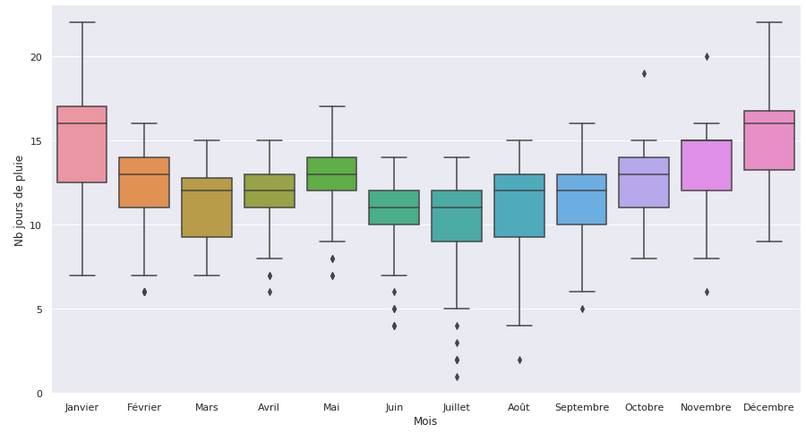

> conseil: utiliser le résultat des questions précédentes (celles avec `melt`)

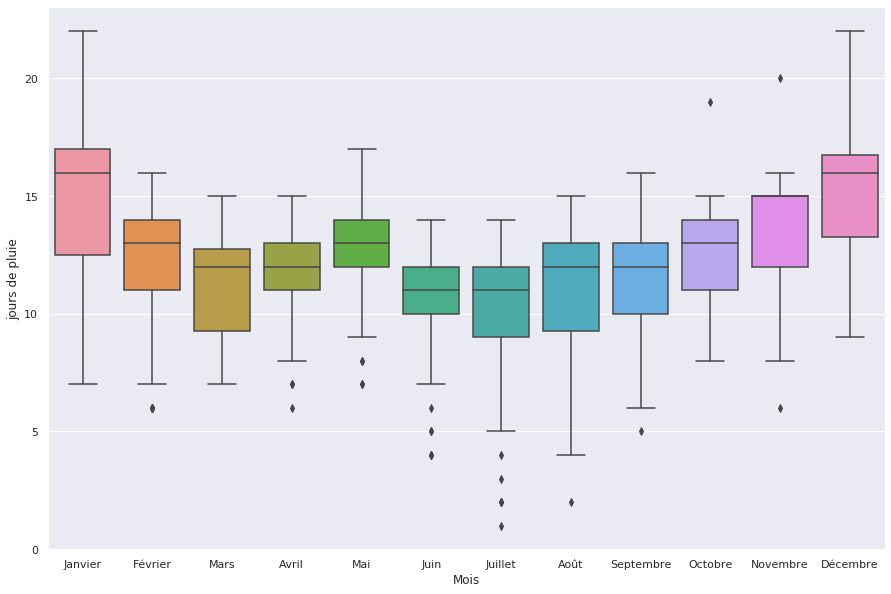

In [35]:
# Distribution mensuelle des nombres de jours de pluie...
import seaborn as sns
import matplotlib as mtp 
from matplotlib import pyplot as plt
mtp.rcParams['figure.figsize']=(15,10) # On fixe la variable d'environnement de matplotlib pour la taille du plot 
sns.set() 
Pivot_3=Pivot_2[Pivot_2['Grandeur']=='Jours de pluie'].rename(columns={'value':'jours de pluie'})   # On récupère le pivot fait précédement sur les jours de pluies  et on renomme les valeurs par conséquent
sns.boxplot( x='Mois',y='jours de pluie' , data = Pivot_3)  # On fait un boxplot sur les jours de pluies par rapport aux mois .
plt.show()

# VOTRE CODE ICI

Sophistiquez l'affichage précédent pour que les distributions se fassent en fonction de la zone géographique. Le résultat doit ressembler à:

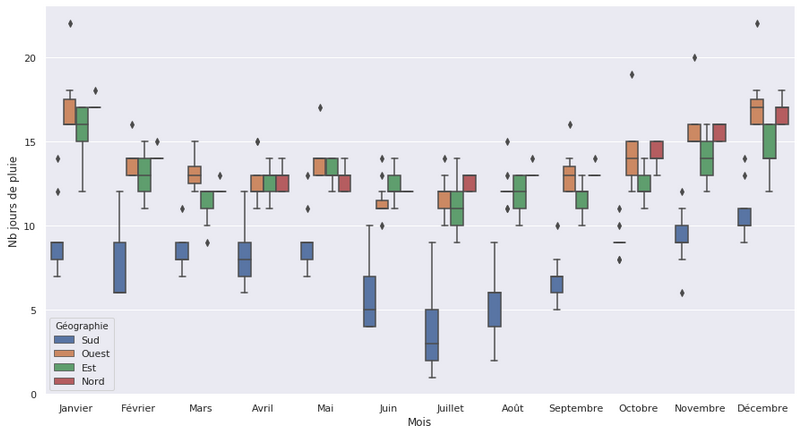

> _conseil_: utilisez le paramètre `by` de [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) 

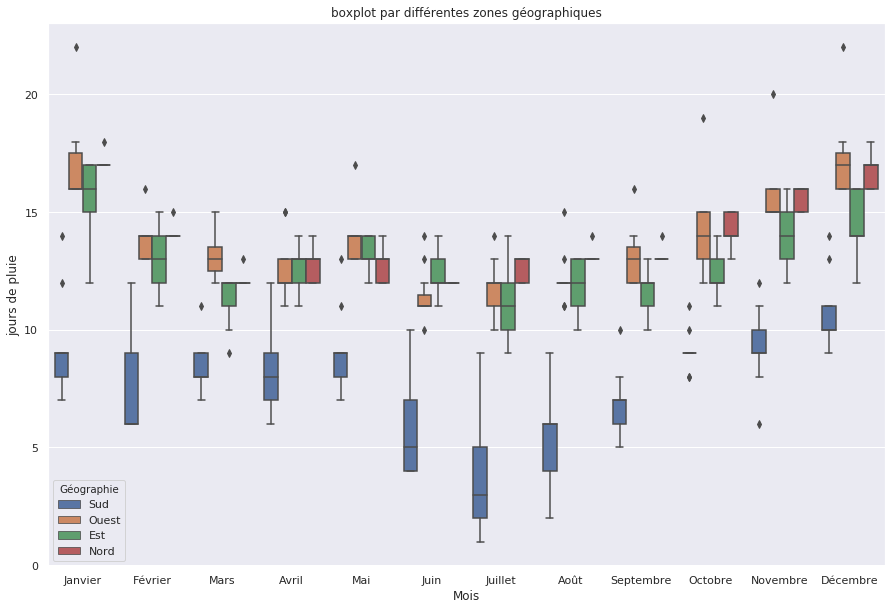

In [42]:
# boxplot par différentes zones géographiques....
plt.title('boxplot par différentes zones géographiques' )
sns.boxplot( x='Mois',y='jours de pluie' , data = Pivot_3,hue='Géographie') # Création de boxplot du nombres de jours de pluie par mois
plt.show()

Enfin, affichez la distribution marginale des précipitations en fonction de la zone géographique.

Le résultat doit ressembler à:


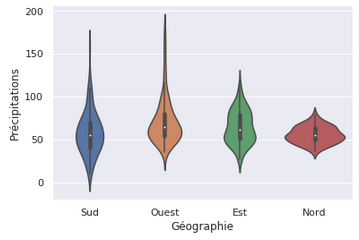

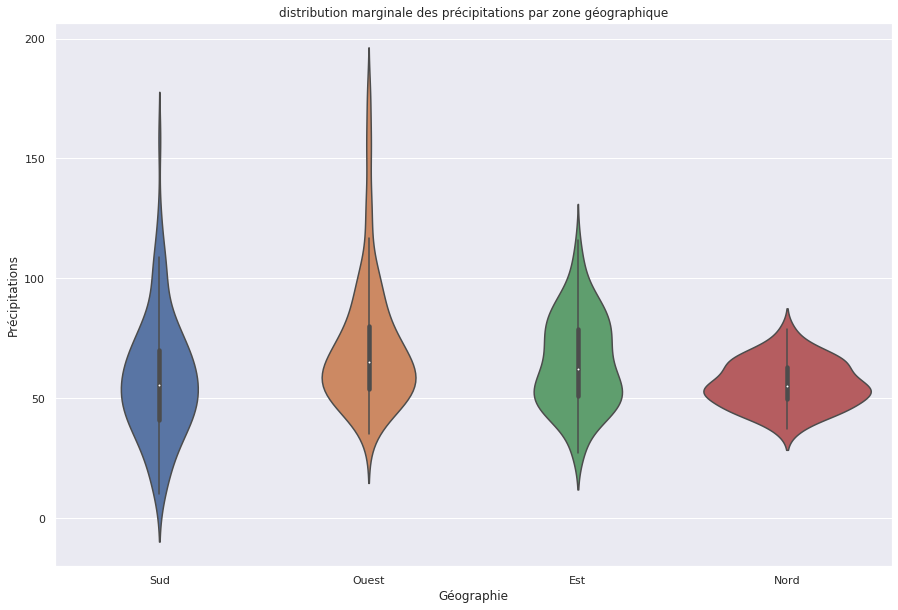

In [41]:
# Affichage de la distribution marginale des précipitations par zone géographique 
Pivot_4 =Pivot_2[Pivot_2['Grandeur']=='Précipitations'].rename(columns={'value':'Précipitations'}) # On récupère les précipitations par zone géographique
sns.violinplot( x='Géographie',y='Précipitations' , data = Pivot_4) # On affiche la distribution marginale 
plt.title('distribution marginale des précipitations par zone géographique')
plt.show()

## b. Affichages extras (points bonus)

> Cette section est à faire tout à la fin, quand vous aurez traité l'ensemble des TPs de ce cours.

Réalisez toute sorte d'affichage sur ces données que vous pourriez trouver joli et utile. La qualité des affichages et la difficulté pour les réalisée sera prise en compte dans la notation !


Ci-dessous, un exemple, mais soyez créatifs !!

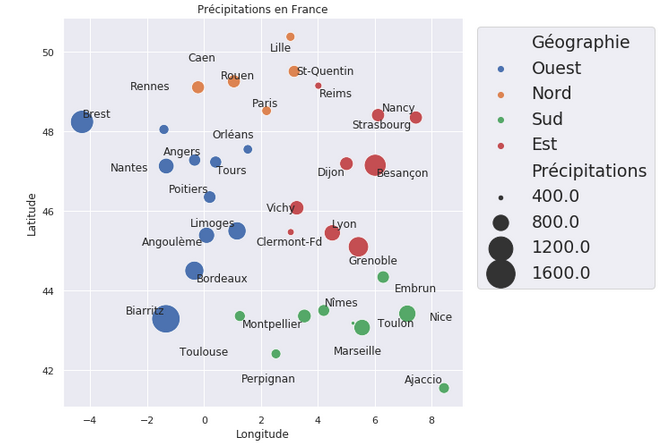

In [0]:
# Il serait intéressant de voir les précipitations et les jours de pluis par saisons : 
# On tronque les dates pour avoir des mois pleins : 
# Hiver = Janvier , Fevrier , Mars 
# Printemps =Avril mai Juin 
# Eté = Juillet Aout Septembre 
# Automne = Octobre ,Novembre , Décembre  
#On crée d'abord la dataframe des précipitations 
data_saison_précipitations = pandas.DataFrame( index=data.index) 
data_saison_précipitations['Hiver']=data['Précipitations'][['Janvier','Février','Mars']].sum(axis=1) # On somme les mois d'hiver
data_saison_précipitations['Printemps']=data['Précipitations'][['Avril','Mai','Juin']].sum(axis=1) # on somme les mois de printemps
data_saison_précipitations['Eté']=data['Précipitations'][['Juillet','Août','Septembre']].sum(axis=1) # on somme les mois d'été
data_saison_précipitations['Automne']=data['Précipitations'][['Octobre','Novembre','Décembre']].sum(axis=1) # on somme les mois d'automne 


# On crée la dataframe des jours de pluie 
data_saison_pluie = pandas.DataFrame( index=data.index) 
data_saison_pluie['Hiver']=data['Jours de pluie'][['Janvier','Février','Mars']].sum(axis=1) # On somme les mois d'hiver
data_saison_pluie['Printemps']=data['Jours de pluie'][['Avril','Mai','Juin']].sum(axis=1) # on somme les mois de printemps
data_saison_pluie['Eté']=data['Jours de pluie'][['Juillet','Août','Septembre']].sum(axis=1) # on somme les mois d'été
data_saison_pluie['Automne']=data['Jours de pluie'][['Octobre','Novembre','Décembre']].sum(axis=1) # on somme les mois d'automne

# On ajoute au deux jeux de données la variable géographie: 
data_saison_pluie['Géographie']=data['Géographie']
data_saison_précipitations['Géographie']=data['Géographie']

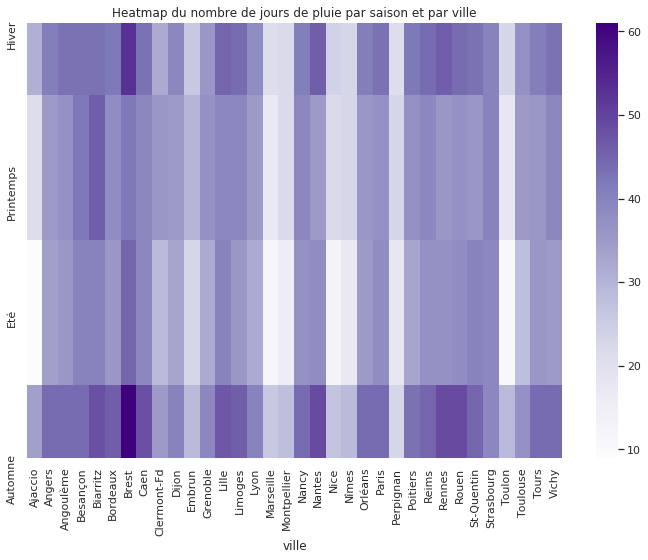

In [70]:
mtp.rcParams['figure.figsize']=(12,8) # On redimensionne figure à l'aide de  la variable d'environnement figure.figsize de matplotlib
sns.heatmap(data_saison_pluie[['Hiver','Printemps','Eté','Automne']].transpose() , cmap='Purples') # On affiche la carte de chaleur de la dataframe transposé  , pour une 
# meilleur lisibilité 
plt.title('Heatmap du nombre de jours de pluie par saison et par ville') # On donne un titre 
plt.show()

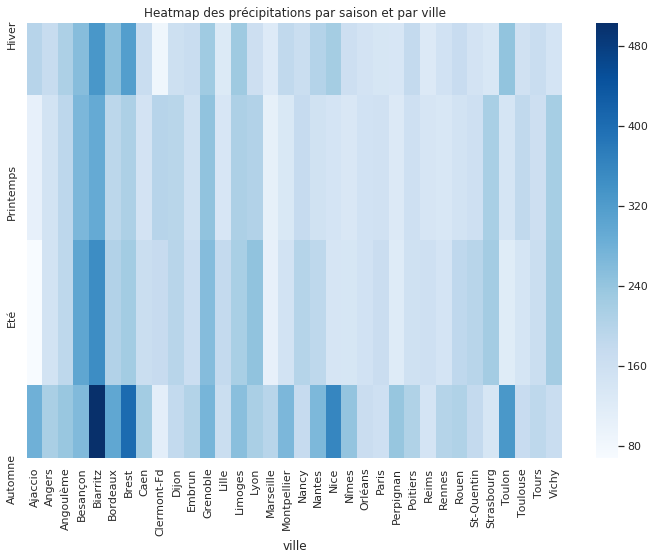

In [72]:
sns.heatmap(data_saison_précipitations[['Hiver','Printemps','Eté','Automne']].transpose() , cmap='Blues')  # On affiche la carte de chaleur de la dataframe transposé  , pour une 
# meilleur lisibilité  sur les précipitations 
plt.title('Heatmap des précipitations par saison et par ville') # on nomme le graphique 
plt.show()

Variation des températures par rapport au mois de Janvier


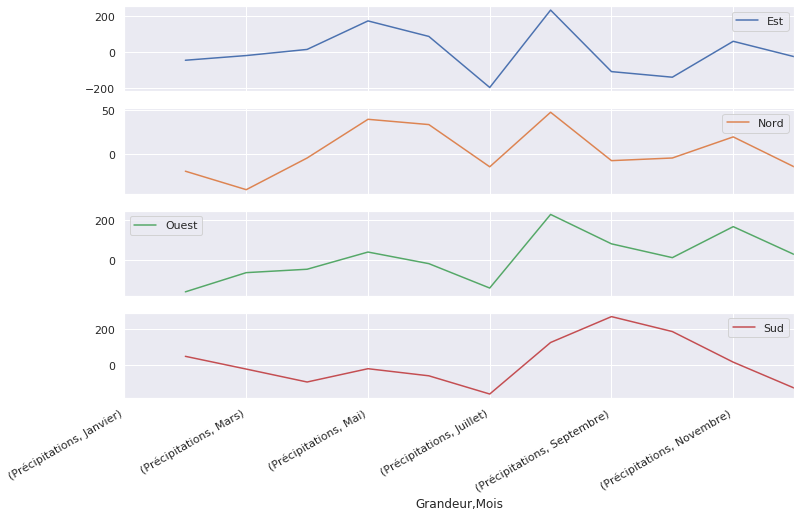

In [118]:
Variation_by_Cardinal_point = data[['Précipitations','Géographie']].groupby('Géographie').sum().transpose().diff() 
# Ici je créer une dataframe qui va grouper les villes par régions , je transpose et j'applique une différencation , 'diff', pour avoir les variations de température sur tout 
# les mois à partir du mois de janvier. J'affiche ensuite ces variations : 
print('Variation des températures par rapport au mois de Janvier')
Variation_by_Cardinal_point.plot(subplots=True)

plt.show()

In [0]:
prec=data['Précipitations'].sum(axis=1)  # Je récupère le volume total des précipitations
jdp=data['Jours de pluie'].sum(axis=1)   # Je récupère le nombre total de jours de pluie .  
Ratio_precip_jdp = pandas.DataFrame(index=data.index.values)
Ratio_precip_jdp['ratio'] = prec/jdp # Je calcule le ratio volume total des précipitations / nombre total de jours de pluie  par ville 
# Ce ratio permet de mettre en évidence l'intensité des pluies , si le ratio est elevé celà veut dire qu'il a plus intensement durant les jours de pluie et au contraire si il est 
# petit, qu'il a plu peu de jours .

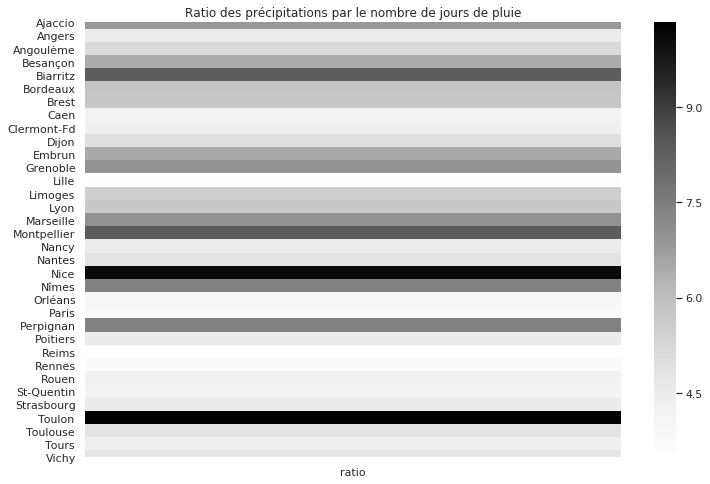

In [115]:
sns.heatmap(Ratio_precip_jdp , cmap='Greys') # On fait une heatmap du ratio crée précédement avec des niveaux de gris pour visualiser rapidement quelle ville 
# Subit de fortes averses et quels villes vivent constamment avec une légère bruine .
plt.title('Ratio des précipitations par le nombre de jours de pluie')
plt.show()

In [112]:
Ratio_precip_jdp.transpose()

,Ajaccio,Angers,Angoulème,Besançon,Biarritz,Bordeaux,Brest,Caen,Clermont-Fd,Dijon,Embrun,Grenoble,Lille,Limoges,Lyon,Marseille,Montpellier,Nancy,Nantes,Nice,Nîmes,Orléans,Paris,Perpignan,Poitiers,Reims,Rennes,Rouen,St-Quentin,Strasbourg,Toulon,Toulouse,Tours,Vichy
ratio,6.873684,4.480519,5.1625,6.43787,8.327684,5.845679,5.756219,4.218935,4.325758,4.993197,6.462963,6.979167,3.578947,5.515152,5.710345,7.013158,8.363636,4.478261,4.815476,10.093023,7.391304,3.980769,3.851852,7.4,4.529032,3.484848,3.77381,4.261905,4.170732,4.550633,10.333333,4.788321,4.375796,4.726708
